# **IMPLEMENTING NEURAL NETWORKS FROM SCRATCH**

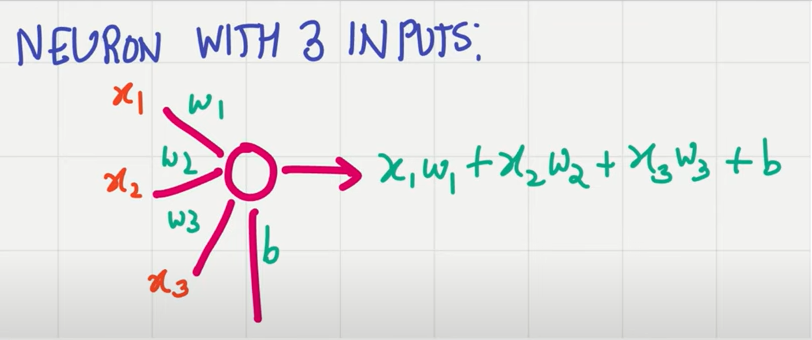

# **Coding a neuron**

In [75]:
input = [1,2,3]
weights = [0.2,0.8,-0.3]
bais = 2

weighted_sum_of_input = 0
for i in range(len(input)):
  weighted_sum_of_input += input[i] * weights[i]

output = weighted_sum_of_input + bais
print(output)

2.9000000000000004


# **CODING LAYER OF NEURONS**

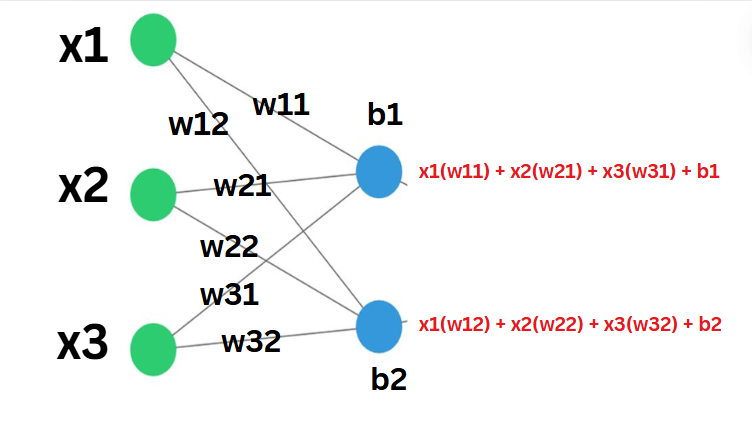

In [76]:
input = [1,2,3]
weights = [[0.2,0.8,-0.3],[0.5,-0.91,0.26]]
bais = [2,3]
neurons = 2

weighted_sum_of_inputs = [0,0]
for i in range(neurons):
    weig_sum = 0
    for j in range(len(weights[i])):
      weig_sum += weights[i][j] * input[j] # the dot product, which is the sum of the products of their corresponding elements.
    weighted_sum_of_inputs[i] = weig_sum + bais[i]

print(weighted_sum_of_inputs)

"""
for b,w in zip(bais,weights):
    sum = 0
    for w,i in zip(w,input):
        sum += (w*i)
    output = sum + b
    print(output)
"""

[2.9000000000000004, 2.46]


'\nfor b,w in zip(bais,weights):\n    sum = 0\n    for w,i in zip(w,input):\n        sum += (w*i)\n    output = sum + b\n    print(output)\n'

# **Using NUMPY AND DOT PRODUCT FOR MULTIPLICATION**

In [77]:
import numpy as np

# **VECTOR AND VECTOR**

In [78]:
#internal implementation
X = [1,2,3]
Y = [1,2,3]
dot_product = 0
for x,y in zip(X,Y):
    dot_product += x*y
print("DOT PRODUCT BY OUR IMPLEMENTATION", dot_product)

print("DOT PRODUCT BY NUMPY : ")
X = (np.array([1,2,3]))
Y = (np.array([1,2,3]))
print(np.dot(X,Y))

DOT PRODUCT BY OUR IMPLEMENTATION 14
DOT PRODUCT BY NUMPY : 
14.0


# **VECTOR AND MATRIX**

In [79]:
#internal implementation
X = [1,2,3]
Y = [[4,5,6],[7,8,9]] # rule -> pehly ki col - dosry ki row =||||= pehly ki row dosry ki col => Ans
X = (np.array([1,2,3]))
Y = (np.array(Y))
"""
THERE IS A HUGE DIFFERENCE IN VEC * VEC ITS SAME I.E COMMUTATIVE PROPERTY HOLDS BUT IN MATRICES OR VEC * MATRICES =>A*B != B*A
NP.dot(input,weights) in matrices is multiplying each column of weights to inputs and then adding them but
NP.dot(weights,input) in matrices is multiplying each row of weights to inputs and then adding them

Since we store weights of each neuron rowwise we need to do this second
"""

Ans = np.dot(Y,X)
print('NUMPY - WEIGHTS * INPUT: ' , Ans)

NUMPY - WEIGHTS * INPUT:  [32. 50.]


# **CODING A LAYER OF NEURONS AND OUTPUT OF A ONE SAMPLE**

In [80]:
#internal implementation
X = np.array([1,2,3])
Y = np.array([[4,5,6],[7,8,9]]) # rule -> pehly ki col - dosry ki row =||||= pehly ki row dosry ki col => Ans
bais = np.array([2,3])
"""
THERE IS A HUGE DIFFERENCE IN VEC * VEC ITS SAME I.E COMMUTATIVE PROPERTY HOLDS BUT IN MATRICES OR VEC * MATRICES =>A*B != B*A
NP.dot(input,weights) in matrices is multiplying each column of weights to inputs and then adding them but
NP.dot(weights,input) in matrices is multiplying each row of weights to inputs and then adding them

Since we store weights of each neuron rowwise we need to do this second one otherwise you will get and error bcx of rule of multiplication
"""

Ans1 = np.dot(Y,X)
print('NUMPY - WEIGHTS * INPUT: ' , Ans1)

output = [Ans1[0] + bais[0] , Ans1[1] + bais[1]]
print(output)

NUMPY - WEIGHTS * INPUT:  [32. 50.]
[34.0, 53.0]


# **CODING AND PASSING A BATCH OF SAMPLES TO A LAYER OF NEURONS**

# In this case instead of doing weights * inputs, **we do inputs * transpose(weights) - np.dot(input,transpose(weights))**

**Ans will be a matrix. FIRST ROW WILL BE FIRST BATCH OUTPUT FOR THREE NEURON i.e whole layer AND SO ON**

In [81]:
#internal implementation
#     batch 1 -input - batch2 inpt and so on
X = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]

Y = [[4,5,6],[7,8,9]] # w of n1 , w of n2
bais = [2,3 ]

def transposer(matrix):
    return np.array(matrix).T

YT = transposer(Y)
X = np.array(X)
Ans1 = np.dot(X,YT)
print('NUMPY - INPUT * TRANSPOSE(WEIGHTS): \n' , Ans1)

print("\n\n\nAdding bais to each of them")
for i in range(len(Ans1)):
  Ans1[i][0] += bais[0]
  Ans1[i][1] += bais[1]

print(Ans1)

NUMPY - INPUT * TRANSPOSE(WEIGHTS): 
 [[ 32.  50.]
 [ 77. 122.]
 [122. 194.]
 [167. 266.]]



Adding bais to each of them
[[ 34.  53.]
 [ 79. 125.]
 [124. 197.]
 [169. 269.]]


# **CODING A BUNCH OF LAYERS of NEURONS**
# **In each layer there will be weights and baises i.e each layer will have inputs, weights and bais matrix**

Suppose dimention of inputs = (X,Y) so Y neurons will be used and X number of batches will be there

dimension of weights = (neuron_in_hidden,Y) i.e for every neuron, there will be a weight for all inputs coming to it

array of bais = len(no of neuron in hidden layer)

Since Ans will be a matrix. FIRST ARRAY WILL BE FIRST BATCH OUTPUT FOR THE LAYER OF 2 neuron AND SO ON*

So output of that hidden layer will be (X,no of neuron in that hidden layer)

In [82]:
#internal implementation
#     batch 1 -input - batch2 inpt and so on
X = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
W1 = [[4,5,6],[7,8,9]] # w of n1 => len equal to outputs of each batch , w of n2
bais1 = [2,3]
W2 = [[1,-0.2],[2,-0.6]] # w of n1 , w of n2
bais2 = [-2.5,3.0]

X = np.array(X)
W1 =  np.array(W1)
bais1 =  np.array(bais1)
W2 =  np.array(W2)
bais2 =  np.array(bais2)

def transposer(matrix):
    return np.array(matrix).T

YT = transposer(Y)

Ans1_of_first_layer = np.dot(X,YT)  + bais1
print('NUMPY - INPUT * TRANSPOSE(WEIGHTS) + bais: \n' , Ans1_of_first_layer)

Ans2_of_second_layer = np.dot(Ans1_of_first_layer,transposer(W2)) + bais2
print('NUMPY - output_of_first_hidden * TRANSPOSE(WEIGHTS) + bais: \n' , Ans2_of_second_layer)

NUMPY - INPUT * TRANSPOSE(WEIGHTS) + bais: 
 [[ 34.  53.]
 [ 79. 125.]
 [124. 197.]
 [169. 269.]]
NUMPY - output_of_first_hidden * TRANSPOSE(WEIGHTS) + bais: 
 [[ 20.89999962  39.20000076]
 [ 51.5         86.        ]
 [ 82.09999847 132.80000305]
 [112.69999695 179.6000061 ]]


# **DENSE LAYERS AND A SPIRAL NON LINEAR DATASET**

In [83]:
pip install nnfs

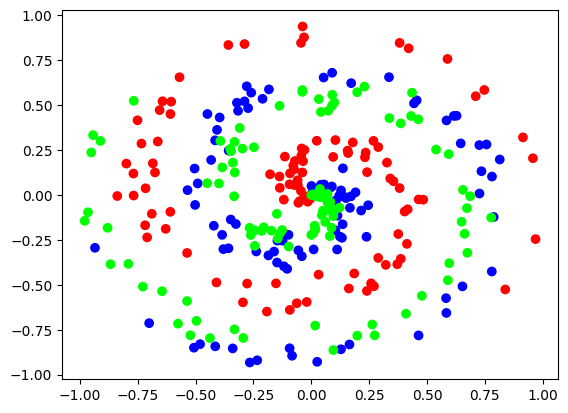

In [84]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [134]:
# given a number of inputs and no of neurons - it should predict the weights
class dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.inputs = inputs
    self.outputs = np.dot(inputs, self.weights) + self.biases

  # Backward pass
  def backward(self, dvalues):
      # Gradients on parameters
      self.dweights = np.dot(self.inputs.T, dvalues)
      self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
      self.dinputs = np.dot(dvalues, self.weights.T)



# **IMPLEMENTING RELU ACTIVATION:**

In [146]:
class RELU:
  def forward(self,inputs):
    self.inputs = inputs
    self.outputs = np.maximum(0,inputs)
  # Backward pass
  def backward(self, dvalues):
      # Since we need to modify the original variable,
      # let’s make a copy of values first
      self.dinputs = dvalues.copy()
      # Zero gradient where input values were negative
      self.dinputs[self.inputs <= 0] = 0

In [147]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = RELU()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.outputs)
# Let's see output of the first few samples:
print(activation1.outputs[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.1176935e-04 0.0000000e+00 0.0000000e+00]
 [2.5237128e-05 0.0000000e+00 0.0000000e+00]
 [2.4100386e-04 0.0000000e+00 0.0000000e+00]
 [6.6165725e-04 0.0000000e+00 0.0000000e+00]]


# **IMPLEMENTING SOFTMAX**

In [148]:
# Softmax activation
class Softmax:
 # Forward pass
 def forward(self, inputs):
  # subtracting
  sub = inputs - np.max(inputs, axis=1, keepdims=True)
  exp_values = np.exp(sub)
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.outputs = probabilities

# **FORWARD PROPAGATION IN NEURAL NETWORK**

In [149]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = RELU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.outputs)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.outputs)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.outputs)
# Let's see output of the first few samples:
print(activation2.outputs[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333352 0.33333266 0.33333385]
 [0.333333   0.33333293 0.33333406]
 [0.3333335  0.3333318  0.33333465]
 [0.33333367 0.3333312  0.3333351 ]]


# **LOSSES**

# **FORMULA OF CATEGORICAL_CROSS_ENTROPY_LOSS**

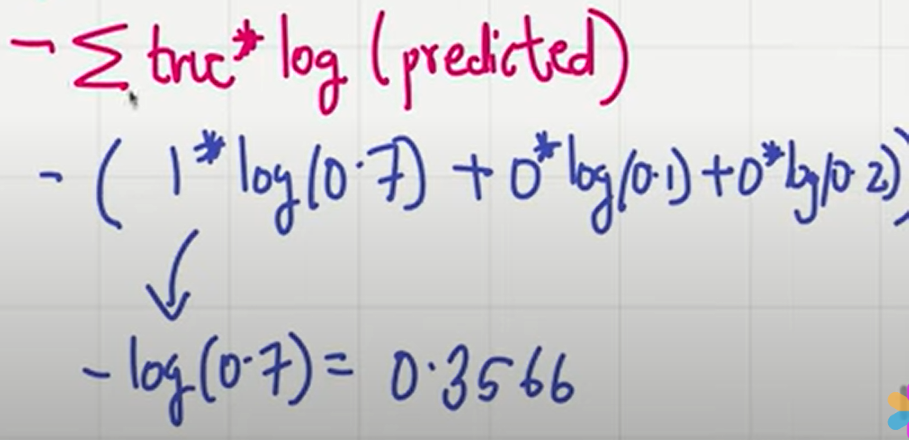

In [150]:
# Common loss class
class Loss:
 # Calculates the losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

In [151]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples),y_true]
    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(
      y_pred_clipped*y_true,
      axis=1
      )
  # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods
  # Backward pass
  def backward(self, dvalues, y_true):
      # Number of samples
      samples = len(dvalues)
      # Number of labels in every sample
      # We'll use the first sample to count them
      labels = len(dvalues[0])

      # If labels are sparse, turn them into one-hot vector
      if len(y_true.shape) == 1:
          y_true = np.eye(labels)[y_true]

      # Calculate gradient
      self.dinputs = -y_true / dvalues
      # Normalize gradient
      self.dinputs = self.dinputs / samples

In [152]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]])
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


In [153]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.outputs = self.activation.outputs
        # Calculate and return loss value
        return self.loss.calculate(self.outputs, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

# **ADAM OPTIMIZER**

In [154]:
import numpy as np

# Adam optimizer
class Optimizer_Adam:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Get corrected momentum
        # self.iteration is 0 at first pass and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [155]:
# Create dataset
X, y = spiral_data(samples=1000, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = RELU()


# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-5)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function, takes the output of first dense layer here
    activation1.forward(dense1.outputs)


    # Perform a forward pass through second Dense layer, takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.outputs)

    # Perform a forward pass through the activation/loss function, takes the output of second dense layer here and returns loss
    data_loss = loss_activation.forward(dense2.outputs, y)

    # Calculate overall loss
    loss = data_loss

    # Calculate accuracy from output of activation2 and targets, calculate values along first axis
    predictions = np.argmax(loss_activation.outputs, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.outputs, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.365, loss: 1.099 (data_loss: 1.099, lr: 0.05
epoch: 100, acc: 0.564, loss: 0.884 (data_loss: 0.884, lr: 0.04975371909050202
epoch: 200, acc: 0.641, loss: 0.781 (data_loss: 0.781, lr: 0.049507401356502806
epoch: 300, acc: 0.686, loss: 0.713 (data_loss: 0.713, lr: 0.0492635105177595
epoch: 400, acc: 0.709, loss: 0.672 (data_loss: 0.672, lr: 0.04902201088288642
epoch: 500, acc: 0.750, loss: 0.624 (data_loss: 0.624, lr: 0.048782867456949125
epoch: 600, acc: 0.773, loss: 0.592 (data_loss: 0.592, lr: 0.04854604592455945
epoch: 700, acc: 0.771, loss: 0.567 (data_loss: 0.567, lr: 0.048311512633460556
epoch: 800, acc: 0.794, loss: 0.543 (data_loss: 0.543, lr: 0.04807923457858551
epoch: 900, acc: 0.807, loss: 0.522 (data_loss: 0.522, lr: 0.04784917938657352
epoch: 1000, acc: 0.786, loss: 0.518 (data_loss: 0.518, lr: 0.04762131530072861
epoch: 1100, acc: 0.811, loss: 0.489 (data_loss: 0.489, lr: 0.04739561116640599
epoch: 1200, acc: 0.781, loss: 0.496 (data_loss: 0.496, lr: 0.047

In [156]:
# Validate the model
# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)

# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function, takes the output of first dense layer here
activation1.forward(dense1.outputs)

# Perform a forward pass through second Dense layer, takes outputs of activation function of first layer as inputs
dense2.forward(activation1.outputs)

# Perform a forward pass through the activation/loss function, takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.outputs, y_test)

# Calculate accuracy from output of activation2 and targets, calculate values along first axis
predictions = np.argmax(loss_activation.outputs, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.843, loss: 0.446


# **HELPING MATERIAL**

In [145]:
### TRY THESE EXERCISES FOR YOURSELF!

A = [[1, 2, 3], [4, 5, 6], [7, 8,9]]
print(np.sum(A))

print(np.sum(A, axis = 0))
print(np.sum(A, axis = 0).shape)

print(np.sum(A, axis = 1))
print(np.sum(A, axis = 1).shape)

print(np.sum(A, axis = 0,keepdims = True))
print(np.sum(A, axis = 0,keepdims = True).shape)

print(np.sum(A, axis = 1,keepdims = True))
print(np.sum(A, axis = 1,keepdims = True).shape)

print(np.max(A, axis = 0))
print(np.max(A, axis = 1))

45
[12 15 18]
(3,)
[ 6 15 24]
(3,)
[[12 15 18]]
(1, 3)
[[ 6]
 [15]
 [24]]
(3, 1)
[7 8 9]
[3 6 9]
